In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
import scipy.signal
from IPython.display import Audio

In [2]:
letters = np.empty((4, 26, 20), dtype=object)
for i, j, k in np.ndindex(letters.shape):
    subject = i + 1
    letter = chr(ord("A") + j)
    fs, x = scipy.io.wavfile.read(f"letters/{subject}/{letter}/PZ/{k}.wav")
    letters[i, j, k] = x

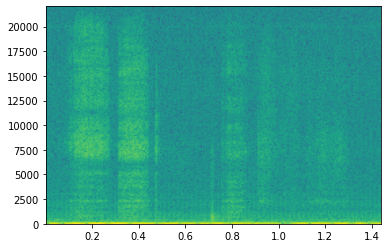

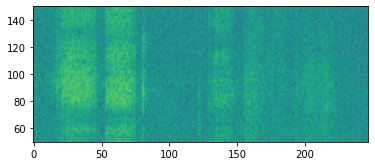

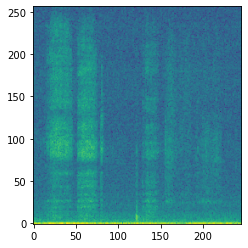

(257, 247)


In [65]:
display(Audio(letters[0,0,0], rate=fs))
X, *_ = plt.specgram(letters[0,0,0], Fs=fs, NFFT=512, noverlap=256)
D = np.abs(np.diff(X, axis=1))
plt.show()
plt.imshow(np.log10(X), origin='lower')
plt.ylim(50, 150)
plt.show()
plt.imshow(np.log10(np.abs(D)), origin='lower')
plt.show()
print(X.shape)

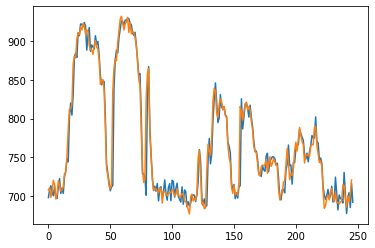

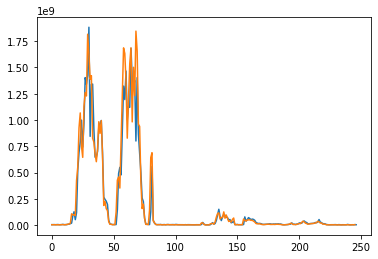

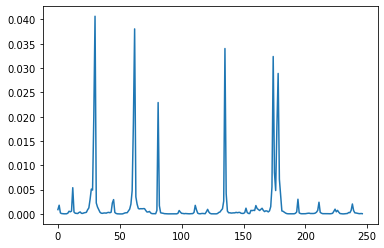

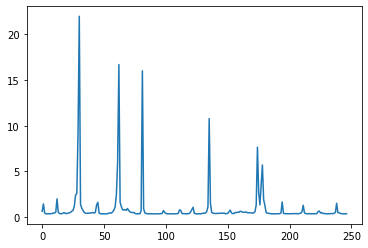

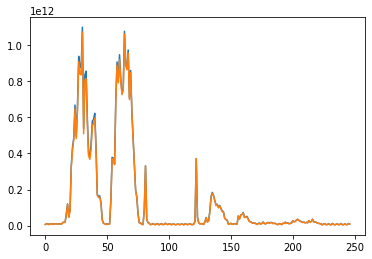

In [87]:
plt.plot(np.sum(np.log10(X[50:150]), axis=0))
plt.plot(np.sum(np.log10(D[50:150]), axis=0))
plt.show()
flux = np.sqrt(np.sum(np.diff(X[50:150], axis=1)**2, axis=0)) / len(X[50:150])
plt.plot(np.sum(X[50:150], axis=0) / 500)
plt.plot(flux)
plt.show()
flat = np.exp(np.sum(np.log(X), axis=0)/len(X)) / (np.sum(X, axis=0)/len(X))
plt.plot(flat)
plt.show()
centroid = np.sum(np.arange(len(X))[:, None] * X, axis=0) / np.sum(X, axis=0)
plt.plot(centroid)
plt.show()
power = np.sum(X[10:], axis=0) # / len(X[10:])
plt.plot(power)
power2 = np.sum(X[10:200], axis=0) # / len(X[50:150])
plt.plot(power2)

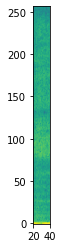

(257, 20) (257, 247) (228,)


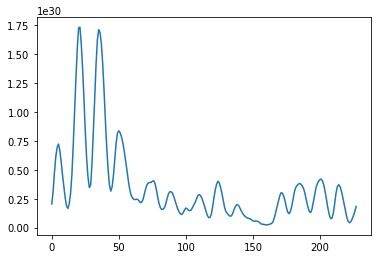

In [125]:
start, end = 20, 40
plt.imshow(np.log10(X), origin='lower')
plt.xlim(start, end)
plt.show()

crop = X[:, start:end]
corr = scipy.signal.correlate(X, crop, mode='valid')[0]
plt.plot(corr)
print(crop.shape, X.shape, corr.shape)
plt.show()

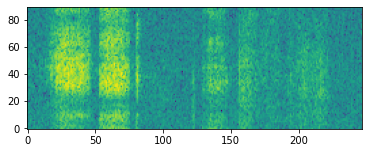

In [127]:
crop = X[50:140]
plt.imshow(np.log10(crop), origin='lower')
plt.show()

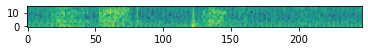

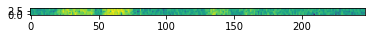

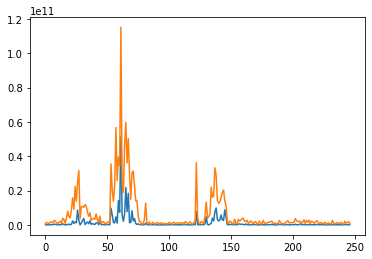

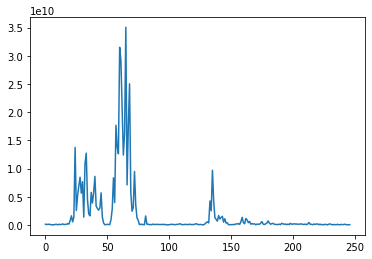

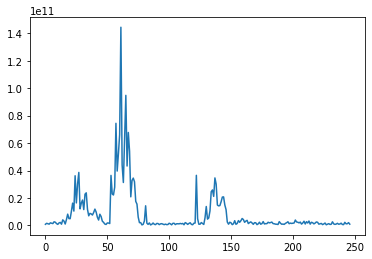

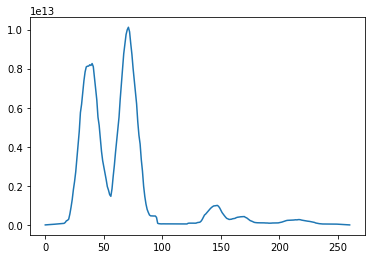

In [220]:
# These frequency ranges seem to be especially useful for separating stroke noise from paper noise:
plt.imshow(np.log(X[10:25]), origin='lower')
plt.show()

plt.imshow(np.log(X[180:185]), origin='lower')
plt.show()

plt.plot(X[20])
plt.plot(np.sum(X[15:25], axis=0))
plt.show()
plt.plot(np.sum(X[180:185], axis=0))
plt.show()
plt.plot(np.sum(X[15:25], axis=0) + np.sum(X[180:185], axis=0))
plt.show()

plt.plot(np.convolve(np.sum(X[20:140], axis=0), np.ones(15)))
plt.show()

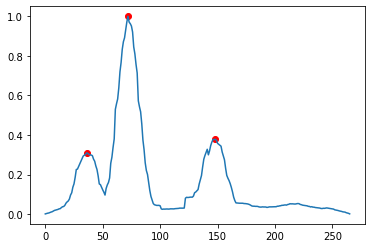

In [270]:
summed = np.sum(X[15:25], axis=0)
smoothed = np.convolve(summed, np.ones(20))
smoothed /= np.max(smoothed)
plt.plot(smoothed)
peaks, info = scipy.signal.find_peaks(smoothed, height=0.2, distance=10)
plt.scatter(peaks, smoothed[peaks], c='red')

(1675800, 2) int32
(88200, 2) int32


/tmp/ipykernel_35471/3015389952.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = scipy.io.wavfile.read("letter_runs/1-A-SM.wav")


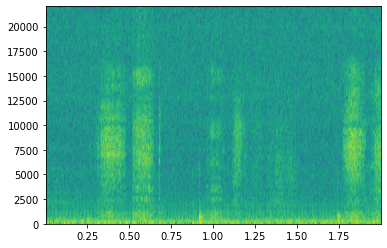

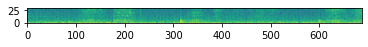

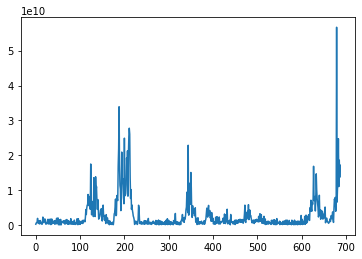

In [208]:
fs, x = scipy.io.wavfile.read("letter_runs/1-A-SM.wav")
print(x.shape, x.dtype)
x = x[:fs*2]
# x = x[int(fs*0.75):fs*2:2]
# fs /= 2
print(x.shape, x.dtype)
display(Audio(x[:, 0], rate=fs))
X2, *_ = plt.specgram(x[:, 0], Fs=fs)
plt.show()
plt.imshow(np.log(X2[0:30]), origin='lower')
plt.show()
plt.plot(np.sum(X2[15:25], axis=0))